#A classical ML, supervised learning classification example, using XGBoost & sklearn / imblearn pipeline with SMOTE & custom transformer on the titanic dataset.

#Version information.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import platform   # For checking python version
import sklearn    # For Classifical ML

message = "     Versions     "
print("*" * len(message))
print(message)
print("*" * len(message))
print("Scikit-learn version {}".format(sklearn.__version__))
print("Numpy version {}".format(np.__version__))
print("Pandas version {}".format(pd.__version__))
print("Matplotlib version {}".format(matplotlib.__version__))
print("Python version {}".format(platform.python_version()))

******************
     Versions     
******************
Scikit-learn version 0.22.2.post1
Numpy version 1.19.5
Pandas version 1.1.5
Matplotlib version 3.2.2
Python version 3.7.10


#Load data.

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/applied_AI_ML/CA1/titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/applied_AI_ML/CA1/titanic/test.csv')

#Data visualization & analysis.

###Display first 5 rows of train & test dataframes.

In [ ]:
# Dislay train data.
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
1,2,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
2,3,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
3,4,1,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S
4,5,0,1,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C


In [ ]:
# Dislay test data.
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,6,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C
1,8,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S
2,9,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,0,0,110564,26.5500,C52,S
3,12,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S
4,14,1,"Borebank, Mr. John James",male,42.0,0,0,110489,26.5500,D22,S


###Display description of train dataframe.

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,897.0,648.253066,378.351039,1.0000,317.000,644.00,981.0000,1309.0000
Survived,897.0,0.387960,0.487557,0.0000,0.000,0.00,1.0000,1.0000
Pclass,897.0,2.280936,0.841982,1.0000,1.000,3.00,3.0000,3.0000
Age,724.0,30.255525,14.574115,0.3333,21.000,28.00,39.0000,76.0000
SibSp,897.0,0.519509,1.091724,0.0000,0.000,0.00,1.0000,8.0000
Parch,897.0,0.416945,0.901426,0.0000,0.000,0.00,0.0000,9.0000
Fare,897.0,34.311148,52.446742,0.0000,7.925,15.05,31.3875,512.3292


###Display data type of features in train dataframe.

In [ ]:
# Check for numerical or categorical data
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

###Number of unique values in each feature.

In [ ]:
print("PassengerId", train['PassengerId'].nunique())
print("Survived", train['Survived'].nunique())
print("Pclass", train['Pclass'].nunique())
print("Name", train['Name'].nunique())
print("Sex", train['Sex'].nunique())
print("Age", train['Age'].nunique())
print("SibSp", train['SibSp'].nunique())
print("Parch", train['Parch'].nunique())
print("Ticket", train['Ticket'].nunique())
print("Fare", train['Fare'].nunique())
print("Cabin", train['Cabin'].nunique())
print("Embarked", train['Embarked'].nunique())
"""
print()
print("Name_prefix", train['Name_prefix'].nunique())
print("gender", train['gender'].nunique())
print("Age_bin", train['Age_bin'].nunique())
print("Ticket_prefix", train['Ticket_prefix'].nunique())
print("Ticket_num", train['Ticket_num'].nunique())
print("Cabin_count", train['Cabin_count'].nunique())
print("Embarked_num", train['Embarked_num'].nunique())
"""

PassengerId 897
Survived 2
Pclass 3
Name 895
Sex 2
Age 85
SibSp 7
Parch 8
Ticket 683
Fare 242
Cabin 147
Embarked 3


'\nprint()\nprint("Name_prefix", train[\'Name_prefix\'].nunique())\nprint("gender", train[\'gender\'].nunique())\nprint("Age_bin", train[\'Age_bin\'].nunique())\nprint("Ticket_prefix", train[\'Ticket_prefix\'].nunique())\nprint("Ticket_num", train[\'Ticket_num\'].nunique())\nprint("Cabin_count", train[\'Cabin_count\'].nunique())\nprint("Embarked_num", train[\'Embarked_num\'].nunique())\n'

###Check missing data.

Missing Values 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            173
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         2
dtype: int64


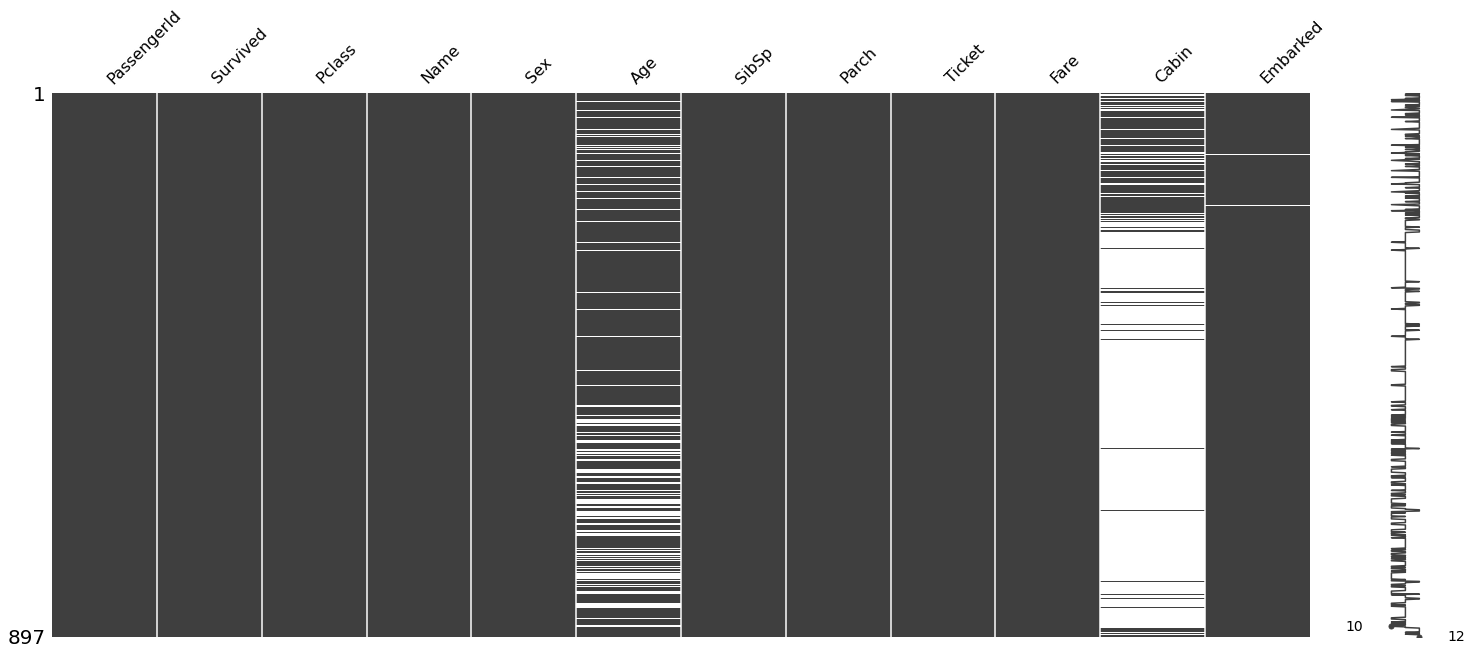

In [ ]:
# Check for missing data
# Generating the summary
print('Missing Values \n', train.isnull().sum())

# Generating a distribution of the missing values
import missingno as msno

msno.matrix(train)

###Display correlation between numerical features.


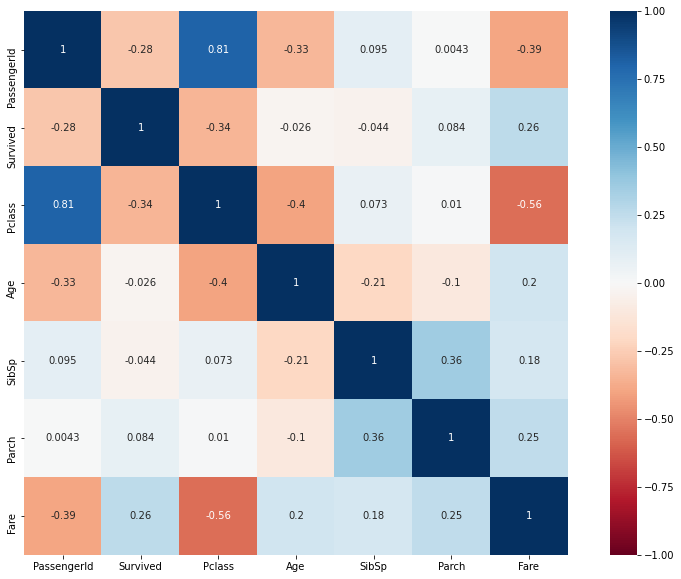

In [4]:
# Correlation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,10))
sns.heatmap(train.corr(),square=True,annot=True,cmap='RdBu',vmin=-1,vmax=1)
plt.show()

###Display pair plot.

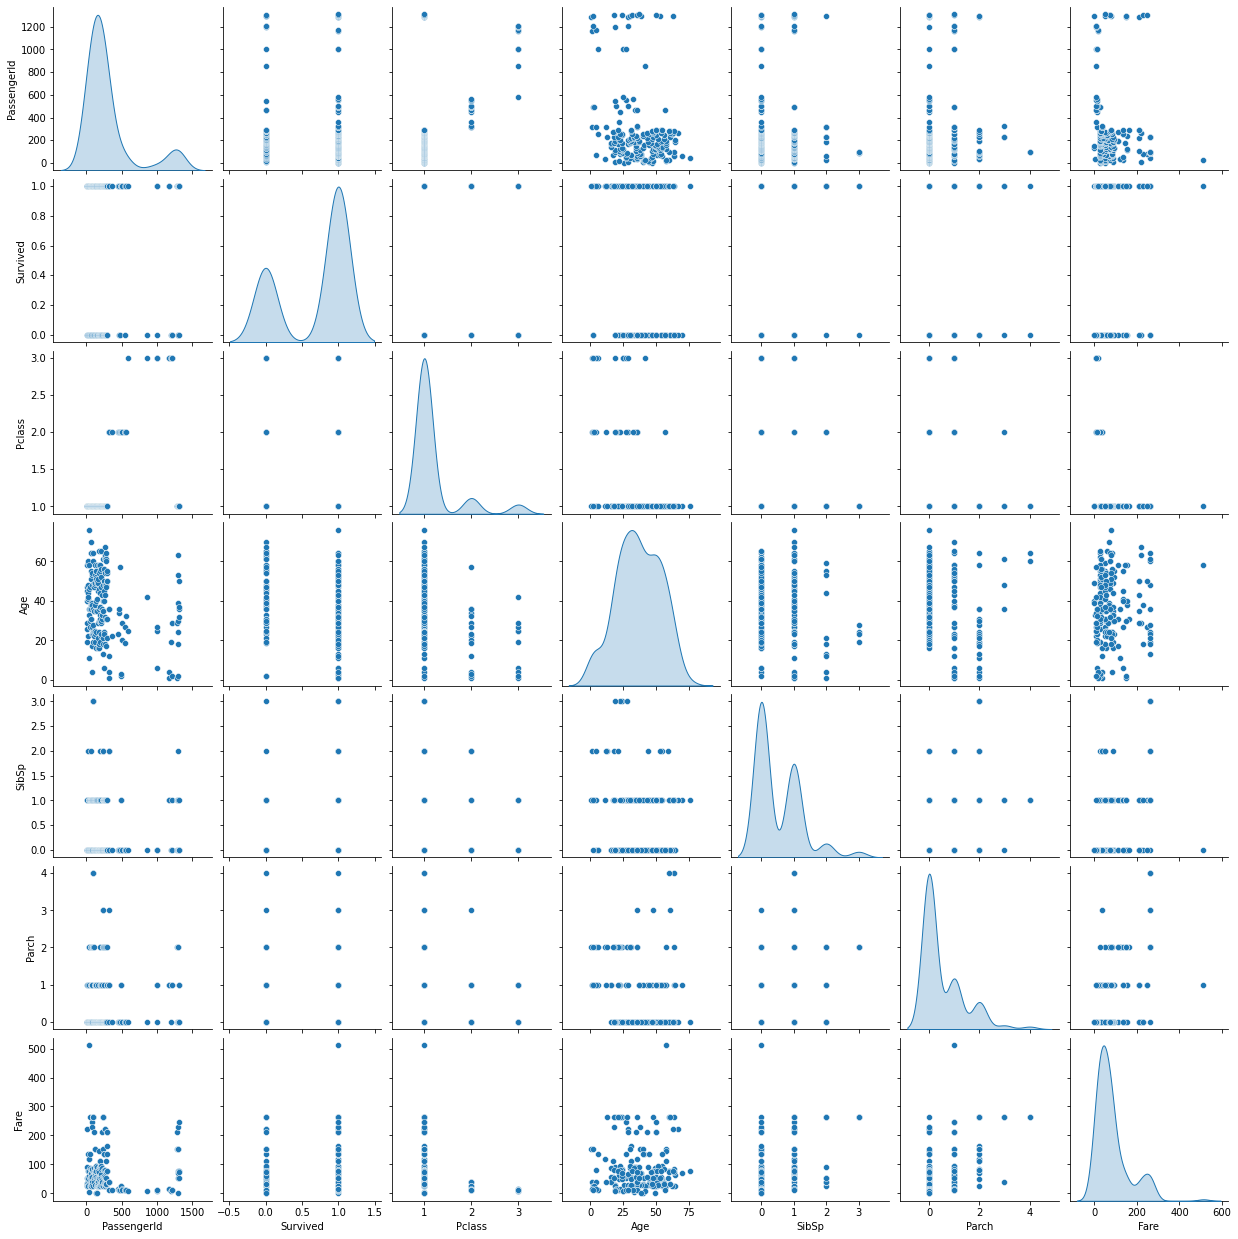

In [5]:
sns.pairplot(train.dropna(), kind='scatter', diag_kind='kde')
plt.show()

###Display pair plot using target label 'Survived' as hue.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


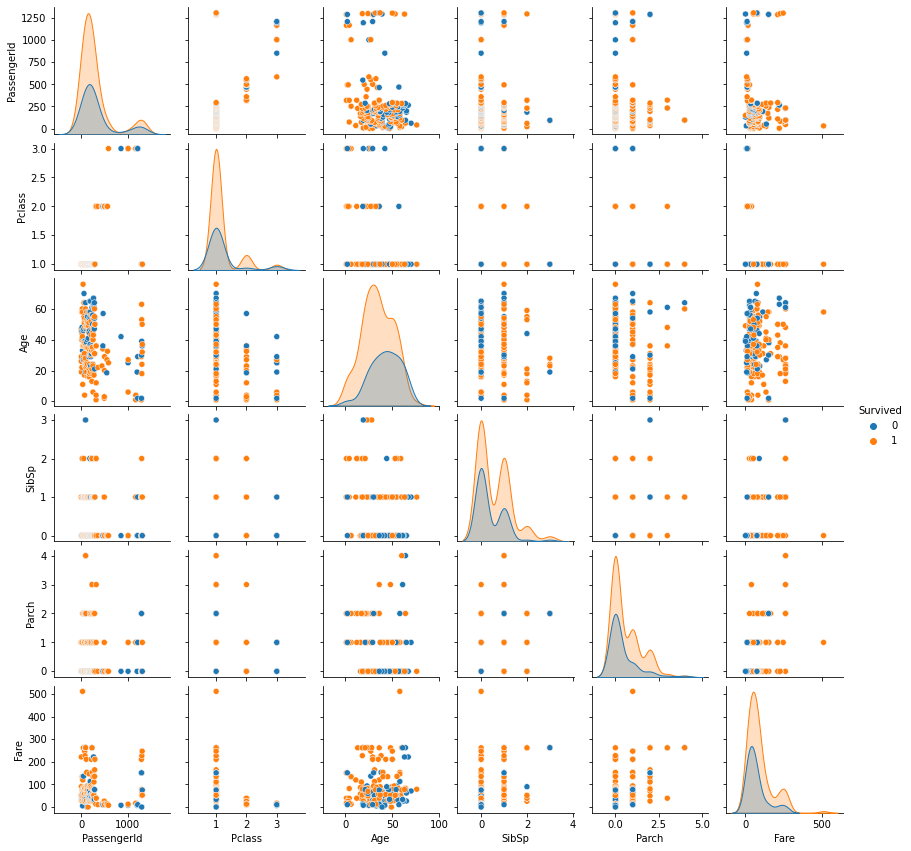

In [6]:
sns.pairplot(train.dropna(), hue="Survived", size=2)
plt.show()

#4. Feature extraction (custom transformer).

In [ ]:
from sklearn.preprocessing import FunctionTransformer

def prefix_fr_name(df):
    # Extract prefix from Name.

    df['Name_prefix'] = df['Name'].str.split(r"\, |. ", expand=True)[1]

    return df

prefix_fr_name_transformer = FunctionTransformer(prefix_fr_name)        

In [ ]:
def convert_gender(df):
    # Convert gender from str to int64.

    convert = []
    for item in df['Sex']:
        if item == 'male': 
            convert.append(1)
        elif item == 'female': 
            convert.append(2)        
        else: 
            convert.append(0)     

    df['gender'] = convert  # assign list to df col

    return df

convert_gender_transformer = FunctionTransformer(convert_gender)    

In [ ]:
def band_age(df):
    # Band Age into bins.

    df['Age_bin'] = pd.cut(df['Age'].fillna(df['Age'].median()), bins=[0,15,30,45,60,999], labels=[5,4,3,2,1])
    df['Age_bin'] = df['Age_bin'].astype('int64')

    return df

band_age_transformer = FunctionTransformer(band_age)    

In [ ]:
def ext_ticket(df):
    # Extract prefix & numbers from Ticket.

    df['Ticket_prefix'] = df['Ticket'].str.split(r"[0-9]", expand=True)[0]
    df['Ticket_num'] = df['Ticket'].str.replace(r"\D+",'0')

    def convert_Ticket_num(col):        
        # Convert items from str to float.
        
        nums = []
        for i, r in enumerate(col):          
            nums.append((float(r)))

        return nums

    df['Ticket_num'] = convert_Ticket_num(df['Ticket_num'])

    return df

ext_ticket_transformer = FunctionTransformer(ext_ticket)    

In [ ]:
def Cabin_count(df):    
    # Count the number of cabins that corresponds to each passenger.
    
    count = []
    for r in df['Cabin']:
        if type(r) == str:
            count.append(len(r))
        else:
            count.append(0)

    df['Cabin_count'] = count

    return df

Cabin_count_transformer = FunctionTransformer(Cabin_count)    

In [ ]:
# convert Embarked from alphabets to numbers based on median fare.

# Notice that C corresponds to the highest median fare & Q the lowest.
print(train['Embarked'].value_counts())
print(train.groupby(['Embarked'])['Fare'].median())

def convert_Embarked(df):
    # Convert Embarked alphabets to numbers.
    
    convert = []
    for a in df['Embarked']:
        if a == 'Q': 
            convert.append(1)
        elif a == 'S': 
            convert.append(2)
        elif a == 'C': 
            convert.append(3)            
        else:
            convert.append(0)    

    df['Embarked_num'] = convert

    return df

convert_Embarked_transformer = FunctionTransformer(convert_Embarked)    

S    634
C    181
Q     80
Name: Embarked, dtype: int64
Embarked
C    28.50000
Q     7.75000
S    14.00415
Name: Fare, dtype: float64


#Feature engineering (custom transformer).

In [ ]:
def feat_eng_num(df):
    # Engineer artificial composite features based on feature correlations.

    df['gender_d_Pclass'] = df['gender'] / df['Pclass']
    df['gender_p_Age_bin'] = df['gender'] + df['Age_bin']
    df['gender_p_Parch'] = df['gender'] + df['Parch']
    df['gender_p_SibSp'] = df['gender'] + df['SibSp']
    df['gender_p_Cabin_count'] = df['gender'] + df['Cabin_count']
    df['gender_p_Embarked_num'] = df['gender'] + df['Embarked_num']

    df['gender_m_Fare'] = df['gender'] * df['Fare']

    df['Fare_d_Pclass'] = df['Fare'] / df['Pclass']
    df['Fare_p_Cabin_count'] = df['Fare'] + df['Cabin_count']
    df['Fare_p_Embarked_num'] = df['Fare'] + df['Embarked_num']

    return df

feat_eng_num_transformer = FunctionTransformer(feat_eng_num)        

###Drop the unused/unwanted columns in the train dataframe.

In [ ]:
def drop_col(df):
    df = df.drop([
            'PassengerId', 
            'Pclass',
            'Name', 
            #'Sex',
            'Age', 
            'SibSp', 
            'Parch', 
            'Ticket',
            'Fare',
            'Cabin',                    
            'Embarked',    
                            
            # Extracted columns                            
            #'Name_prefix',      
            'gender',
            'Age_bin',
            'Ticket_prefix', 
            'Ticket_num', 
            'Cabin_count', 
            'Embarked_num',   
            ],                    
          axis=1)
    
    #print(df.columns)

    return df                   

drop_col_transformer = FunctionTransformer(drop_col)            

#Data Preparation

1.   Randomized train data.
2.   Separate the feature from the label.
3.   Use SMOTE for upsampling. 
4.   Handle the Categorical and Numeric data separately.
5.   Handle missing values.

In [ ]:
# Randomized all rows in the train dataset.
train = train.sample(frac=1.0, random_state=22)

In [ ]:
# Separate the features from the label
# The label here is the Load Status

X = train.drop('Survived', axis= 1)
y = train['Survived']

#print(X.head().T)
#print(y.head())

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=22)  
print(len(X_train), len(y_train))

X_train_cols = X_train.columns
#y_train_cols = y_train.columns

717 717


###Install SMOTE.

In [ ]:
!pip install smote

####Use SMOTE for upsampling.

In [ ]:
# Using SMOTE to upsample train data.
# This don't need to be in pipeline as it applies to train data only.
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTENC

kn = int(len(X_train)*0.05)
print(kn)

# smote_nc will go into the imblearn pipeline below.
smote_nc = SMOTENC(categorical_features=[0,1,2,4,5,6,7,8], k_neighbors=kn, random_state=22)

0.4.3
35


In [ ]:
# 0 to 8 are categorical features in SMOTENC.

# Original
#PassengerId      int64
#Pclass           int64
#Name            object
#Sex             object     # NOT drop  0
#Age            float64
#SibSp            int64
#Parch            int64
#Ticket          object
#Fare           float64
#Cabin           object
#Embarked        object

# Categorical Extracted
#Name_prefix                # NOT drop  1
#Embarked_num
#Ticket_prefix

# Numerical Extracted
#gender
#Age_bin
#Ticket_num
#Cabin_count

# Numerical Engineered      # ALL NOT drop
#gender_d_Pclass                        2
#gender_p_Age_bin                       3
#gender_p_Parch                         4
#gender_p_SibSp                         5
#gender_p_Cabin_count                   6
#gender_p_Embarked_num                  7
#gender_m_Fare                          8
#Fare_d_Pclass              # numerical
#Fare_p_Cabin_count         # numerical
#Fare_p_Embarked_num        # numerical

###Install & import category_encoders.

https://contrib.scikit-learn.org/category_encoders/index.html

In [ ]:
!pip install category_encoders

from category_encoders import TargetEncoder, BinaryEncoder, CatBoostEncoder, WOEEncoder, LeaveOneOutEncoder, JamesSteinEncoder

#Creating Pipeline for the model.

In [ ]:
#from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline, make_pipeline     # imblearn NOT sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.decomposition import PCA 

In [ ]:
#Numeric Transformation Pipeline
numeric_transformer = make_pipeline(
  SimpleImputer(strategy='median'),  
  StandardScaler(),        
  #MinMaxScaler(feature_range=(-1,1)),        
  PowerTransformer(),        
  PCA(),                              
)

#Categorical Transformation Pipeline
categorical_transformer = make_pipeline(
  SimpleImputer(strategy='constant', fill_value='missing'),
  #OneHotEncoder(handle_unknown='ignore'),
  BinaryEncoder(verbose=0),
  CatBoostEncoder(verbose=0),
)

### Compose the 2 types of transformers using ColumnTransformer.


In [ ]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.compose import make_column_selector

# ColumnTransformer takes in a list of tranformers that perform on columns only.
ct = make_column_transformer(
        (numeric_transformer, make_column_selector(dtype_include=[np.float64, np.int64])),
        (categorical_transformer, make_column_selector(dtype_include=['object', 'category'])),
) 

###Install XGboost.

In [ ]:
!pip install xgboost

In [ ]:
# Combine the preprocessor with the Estimator

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier     
#from sklearn.naive_bayes import GaussianNB      
import xgboost as xgb

#Training.


###Algorithm comparison.
#### Quick visual inspection on the performance of various estimator including pre-built Ensemble

LogisticRegression score: 0.839
Perceptron score: 0.800
SGDClassifier score: 0.617
KNeighborsClassifier score: 0.822
SVC score: 0.822
SVC score: 0.811
NuSVC score: 0.811
DecisionTreeClassifier score: 0.839
RandomForestClassifier score: 0.828
AdaBoostClassifier score: 0.806
GradientBoostingClassifier score: 0.811
XGBClassifier score: 0.867


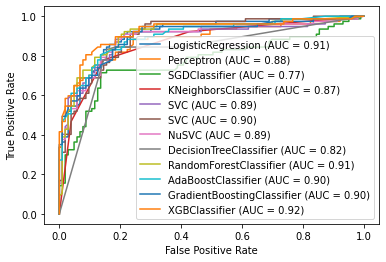

In [ ]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots()

#Create a list of classifiers to do a quick test
classifiers = [
    LogisticRegression(),
    Perceptron(),
    SGDClassifier(),
    KNeighborsClassifier(n_neighbors=3),
    SVC(),
    SVC(kernel="rbf", C= 0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier(objective='binary:logistic', 
                      tree_method='gpu_hist'),     # Use GPU (Need to change Colab runtime type to use GPU).                       
]

for clf in classifiers:
    # pipeline
    pipe_grp = make_pipeline(
    prefix_fr_name_transformer,
    convert_gender_transformer,
    band_age_transformer,   
    ext_ticket_transformer,
    Cabin_count_transformer,
    convert_Embarked_transformer,
    feat_eng_num_transformer,    
    drop_col_transformer,
    ct,                    
    smote_nc,
    clf,
    )
    pipe_grp.fit(X_train, y_train)
    print("%s score: %.3f" % (clf.__class__.__name__, pipe_grp.score(X_test, y_test)))
    roc_disp = plot_roc_curve(pipe_grp, X_test, y_test, ax=ax, name='{}'.format(clf.__class__.__name__))
    print(roc_disp)
plt.show()

###Create pipeline with 1 XGBClassifier.

In [ ]:
pipe = make_pipeline(
    prefix_fr_name_transformer,
    convert_gender_transformer,
    band_age_transformer,   
    ext_ticket_transformer,
    Cabin_count_transformer,
    convert_Embarked_transformer,
    feat_eng_num_transformer,    
    drop_col_transformer,
    ct,                    
    smote_nc,
    xgb.XGBClassifier(
        objective='binary:logistic', 
        tree_method='gpu_hist'),     # Use GPU (Need to change Colab runtime type to use GPU).                                              
    #GradientBoostingClassifier(),
)    

#model = pipe.fit(X_train, y_train)

###Auto-hyperparameter tuning.

In [ ]:
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from time import time

# specify parameters and distributions to sample from
#param_dist = {'xgbclassifier__max_depth': [3,5,7,9,12],
#              'xgbclassifier__n_estimators': np.random.randint(low=300, high=900, size=10, dtype=int),
#              'xgbclassifier__learning_rate': np.random.uniform(low=0.05, high=0.1, size=30),}
param_dist = {'xgbclassifier__max_depth': [3, 5, 7],
              'xgbclassifier__n_estimators': [100, 300, 500],
              'xgbclassifier__learning_rate': [0.1, 0.05, 0.01],}

# run randomized search
n_iter_search=10
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
random_search = RandomizedSearchCV(estimator=pipe, 
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   #scoring ='roc_auc',
                                   scoring = scoring,
                                   refit='AUC', 
                                   return_train_score=True,
                                   cv=5)

#xgb.XGBClassifier().get_params().keys()
#print(pipe.get_params().keys())

start = time()
#best_model = grid_search.fit(X_train, y_train)
best_model = random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
#print(grid_search.cv_results_)              
print(random_search.cv_results_)              

RandomizedSearchCV took 69.86 seconds for 10 candidates parameter settings.
{'mean_fit_time': array([0.94689703, 0.74249444, 0.88641663, 1.68849683, 1.38474674,
       0.73240633, 1.90062194, 0.79260364, 1.53581147, 2.25941491]), 'std_fit_time': array([0.0384095 , 0.00788012, 0.00563473, 0.01206681, 0.01448658,
       0.0035097 , 0.04342385, 0.00574252, 0.00869109, 0.01881554]), 'mean_score_time': array([0.0480268 , 0.0412878 , 0.04168301, 0.04221263, 0.04131341,
       0.03990865, 0.04224925, 0.04075341, 0.04157562, 0.04132433]), 'std_score_time': array([0.00971343, 0.00272256, 0.00333006, 0.0018087 , 0.00106535,
       0.00068419, 0.00259405, 0.00193509, 0.00163916, 0.00089091]), 'param_xgbclassifier__n_estimators': masked_array(data=[100, 100, 100, 300, 300, 100, 300, 100, 300, 500],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_xgbclassifier__max_depth': masked_ar

In [ ]:
#Get the estimator model
best_classifier = best_model.best_estimator_
#Print out the hyperparameters
params = best_classifier['xgbclassifier'].get_params()
print("Best max_depth:", params['max_depth'])
print("Best n_estimators:", params['n_estimators'])
print("Best learning_rate:", params['learning_rate'])

Best max_depth: 3
Best n_estimators: 100
Best learning_rate: 0.1


### Validation and Evaluation.

In [ ]:
from sklearn import metrics
y_pred = best_model.predict(X_test)
print(y_pred)

#Summarise the fit of the classifier_model
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

[0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0
 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1
 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       103
           1       0.87      0.81      0.84        77

    accuracy                           0.87       180
   macro avg       0.87      0.86      0.86       180
weighted avg       0.87      0.87      0.87       180

[[94  9]
 [15 62]]


### ROC Curve

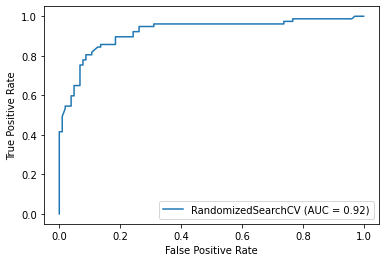

In [ ]:
roc_disp = plot_roc_curve(best_model, X_test, y_test)

###Feature importance.

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(best_model, X_train, y_train, n_repeats=3, random_state=22)

In [ ]:
importances_mean_df = pd.DataFrame(data=result.importances_mean.reshape(1,len(X_train.columns)), columns= X_train.columns)
print("Feature importance mean:")
print((importances_mean_df.T)[0].sort_values())
importances_std_df = pd.DataFrame(data=result.importances_std.reshape(1,len(X_train.columns)), columns= X_train.columns)
print()
print("Feature importance std:")
print((importances_std_df.T)[0].sort_values())

Feature importance mean:
PassengerId              0.000000
Fare_d_Pclass            0.000000
gender_m_Fare            0.000000
gender_p_Embarked_num    0.000000
gender_p_Cabin_count     0.000000
gender_p_SibSp           0.000000
gender_p_Parch           0.000000
gender_p_Age_bin         0.000000
gender_d_Pclass          0.000000
Embarked_num             0.000000
Cabin_count              0.000000
Ticket_num               0.000000
Ticket_prefix            0.000000
Age_bin                  0.000000
gender                   0.000000
Name_prefix              0.000000
Ticket                   0.000000
Fare_p_Cabin_count       0.000000
Fare_p_Embarked_num      0.000000
Name                     0.007504
Parch                    0.042344
SibSp                    0.044435
Cabin                    0.051046
Embarked                 0.056019
Age                      0.060734
Pclass                   0.106173
Fare                     0.113897
Sex                      0.212511
Name: 0, dtype: float64

#Predict test data from file (unlabeled test set).

In [ ]:
y_pred = best_model.predict(test)
print(y_pred)

y_pred = pd.DataFrame(y_pred, columns=['Survived'])
print(y_pred)
print(y_pred.value_counts(normalize=True))
print(y_pred.value_counts())

results = pd.concat([test['PassengerId'], y_pred], axis=1)
print(results)

results.to_csv('submission.csv', index=False)
print(pd.read_csv('submission.csv'))

[1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0
 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1
 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0
 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1
 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 1 0 0 0]
     Survived
0           1
1           1
2           0
3           1
4           1
..        ...
407         0
408         1
409         0
410         0
411      